# HW 1

By: Chengyi (Jeff) Chen

In [1]:
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (16, 12)

import pandas as pd
import numpy as np
import cvxpy as cp
import scipy as sp
from collections import namedtuple
from statsmodels.graphics.gofplots import qqplot
from datetime import datetime, timedelta
from tqdm import tqdm

/opt/anaconda3/envs/ml/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

In [2]:
data = pd.read_excel(
    "./data/HW1_Due20200927.xlsx", sheet_name="DataSource", header=[0, 1]
).dropna(how="all", axis=1)

<IPython.core.display.Javascript object>

In [3]:
vix = data["VIX Index"]
vix = vix.set_index("Date")
vix.index = pd.to_datetime(vix.index)
vix.head()

,Price
Date,
1999-01-15,29.24
1999-01-19,29.24
1999-01-20,28.60
1999-01-21,30.92
1999-01-22,31.95


<IPython.core.display.Javascript object>

In [4]:
spy = data["SPY ETF"]
spy = spy.set_index("Dates")
spy.index = pd.to_datetime(spy.index)
spy.head()

,Price
Dates,
1999-01-15,124.3750
1999-01-19,125.1875
1999-01-20,126.1875
1999-01-21,122.8438
1999-01-22,122.5625


<IPython.core.display.Javascript object>

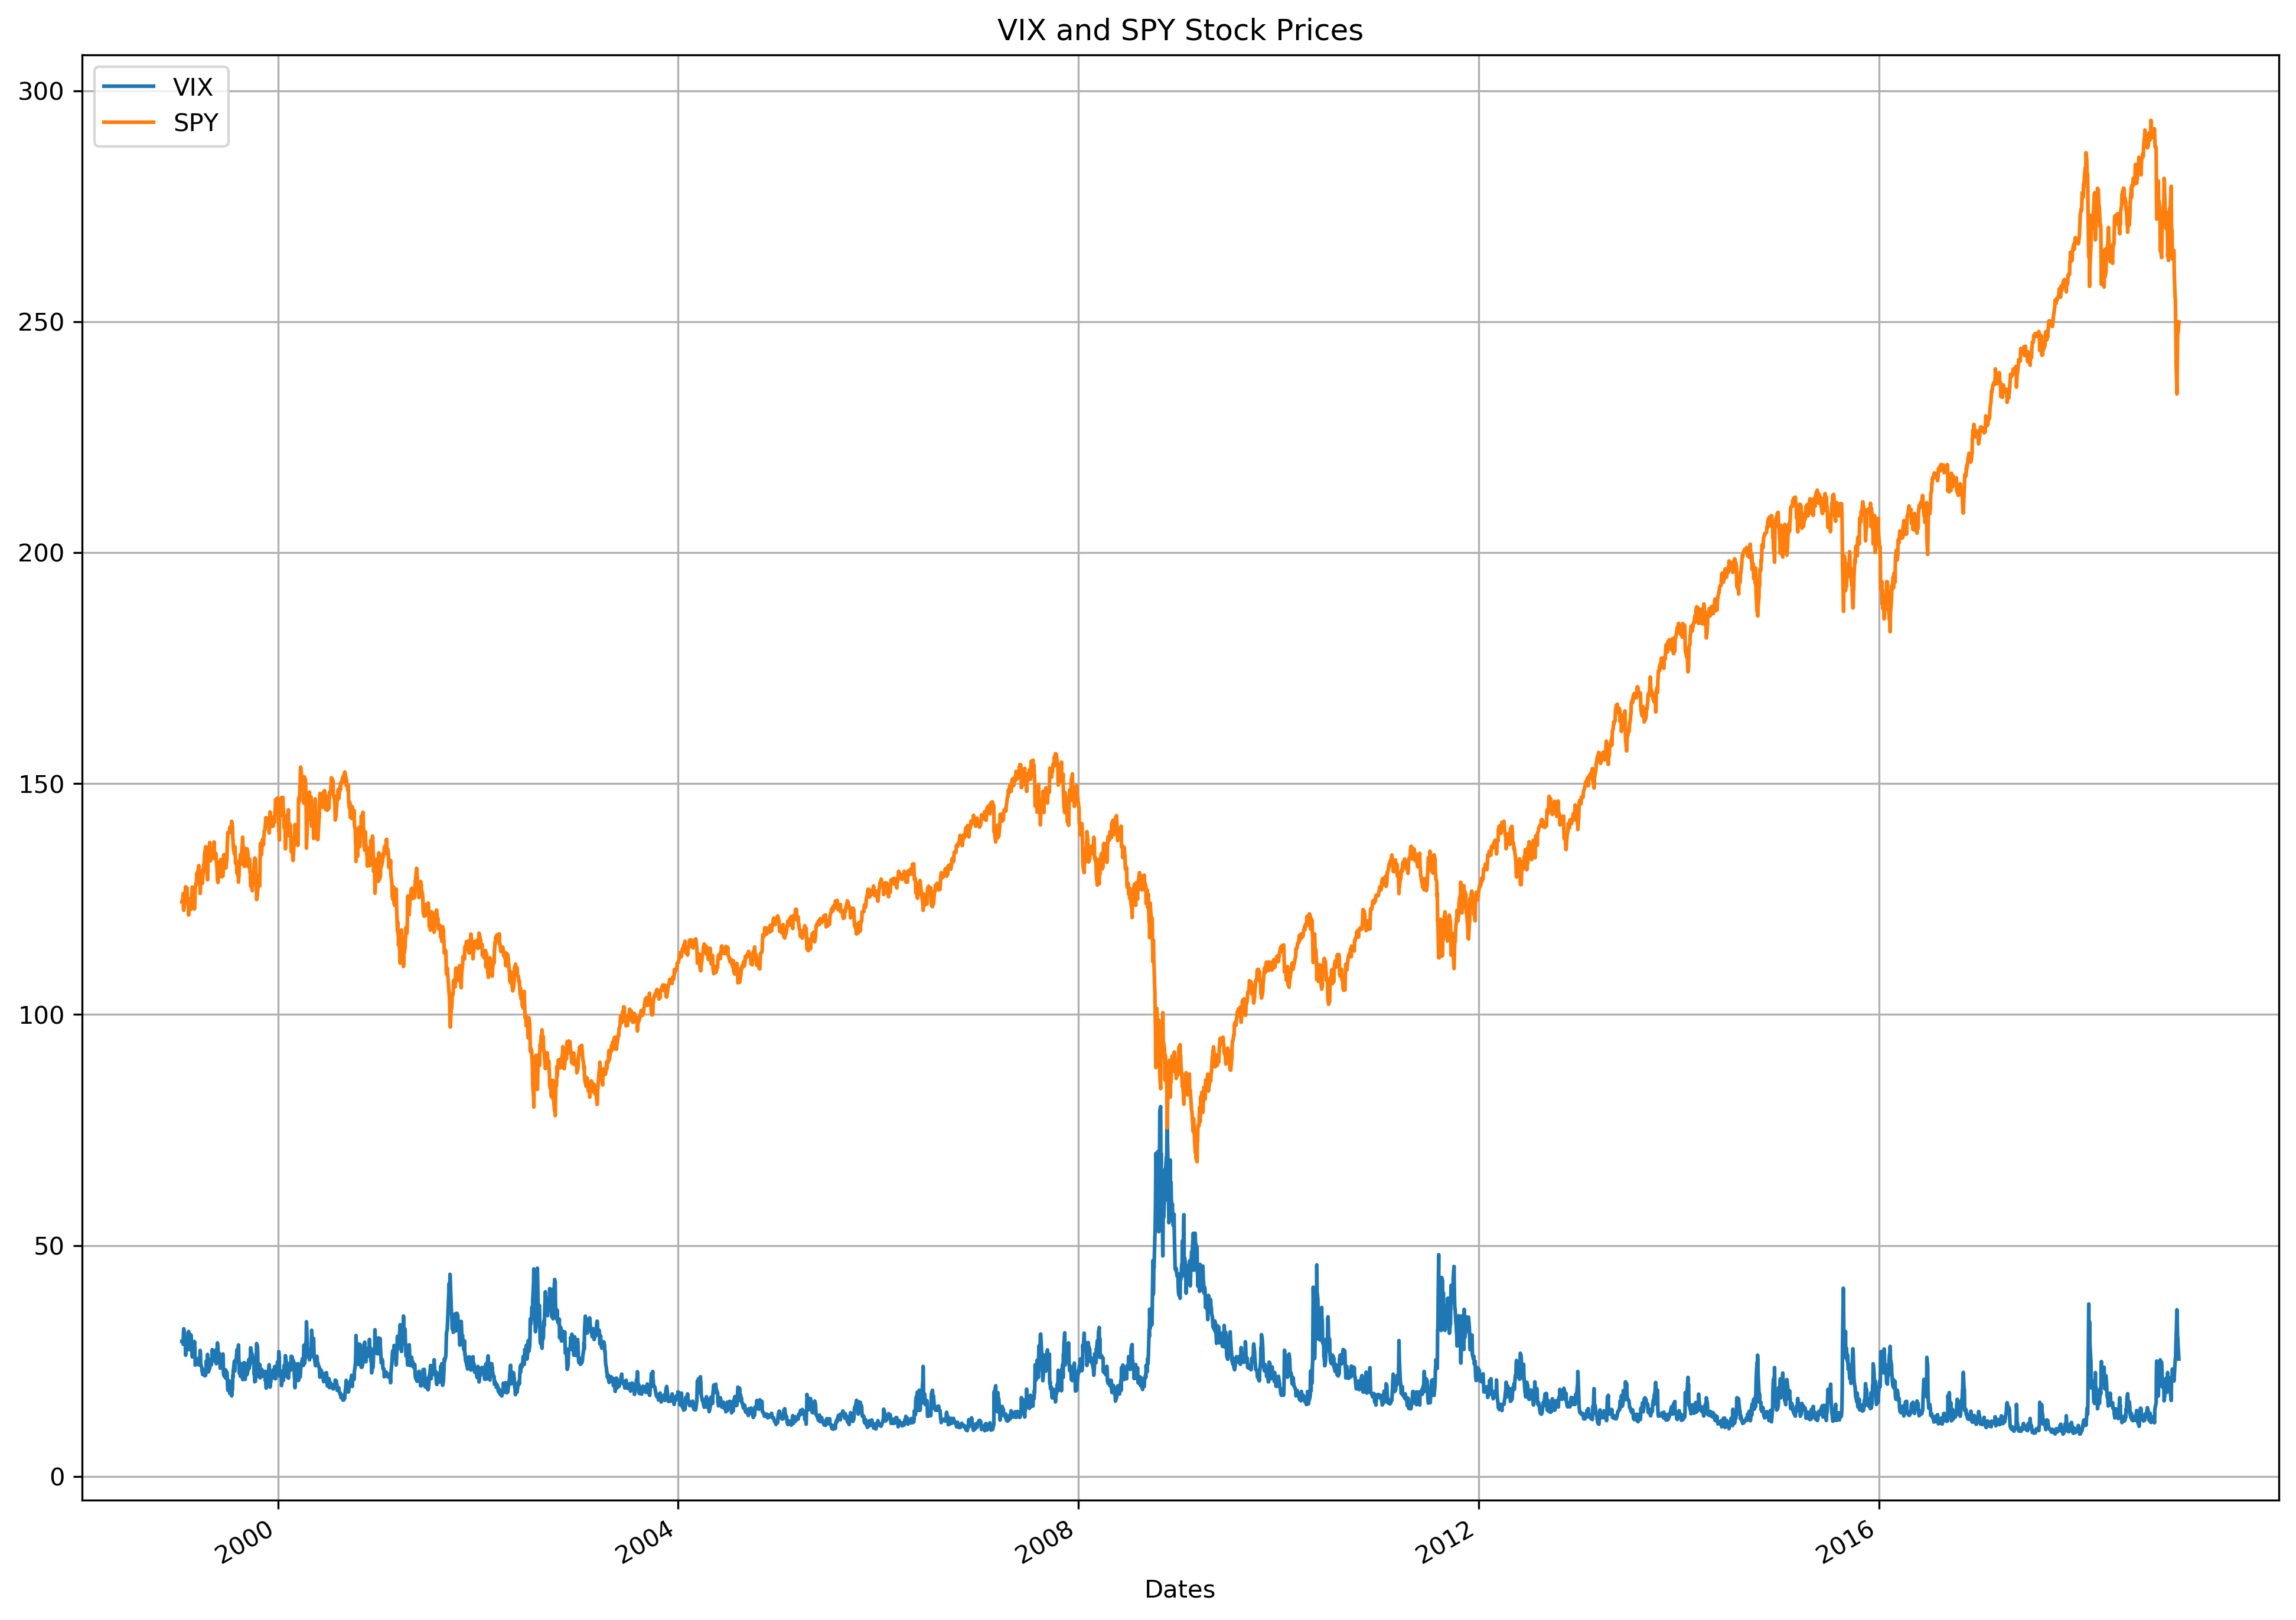

<IPython.core.display.Javascript object>

In [5]:
fig, ax = plt.subplots(1, 1)

vix.rename({"Price": "VIX"}, axis=1).plot.line(ax=ax)
spy.rename({"Price": "SPY"}, axis=1).plot.line(ax=ax)

plt.title("VIX and SPY Stock Prices")
plt.legend()
plt.grid(True)
plt.show()

---

## Problem 1	
Data: the VIX price time series on the tab DataSource

### 1. Transform VIX daily price time series to daily return time series 

In [6]:
vix_returns = vix.pct_change(1).iloc[1:]
vix_returns = vix_returns.rename({"Price": "daily_returns"}, axis=1)
vix_returns.head()

,daily_returns
Date,
1999-01-19,0.000000
1999-01-20,-0.021888
1999-01-21,0.081119
1999-01-22,0.033312
1999-01-25,-0.025665


<IPython.core.display.Javascript object>

In [7]:
spy_returns = spy.pct_change(1).iloc[1:]
spy_returns = spy_returns.rename({"Price": "daily_returns"}, axis=1)
spy_returns.head()

,daily_returns
Dates,
1999-01-19,0.006533
1999-01-20,0.007988
1999-01-21,-0.026498
1999-01-22,-0.002290
1999-01-25,0.010199


<IPython.core.display.Javascript object>

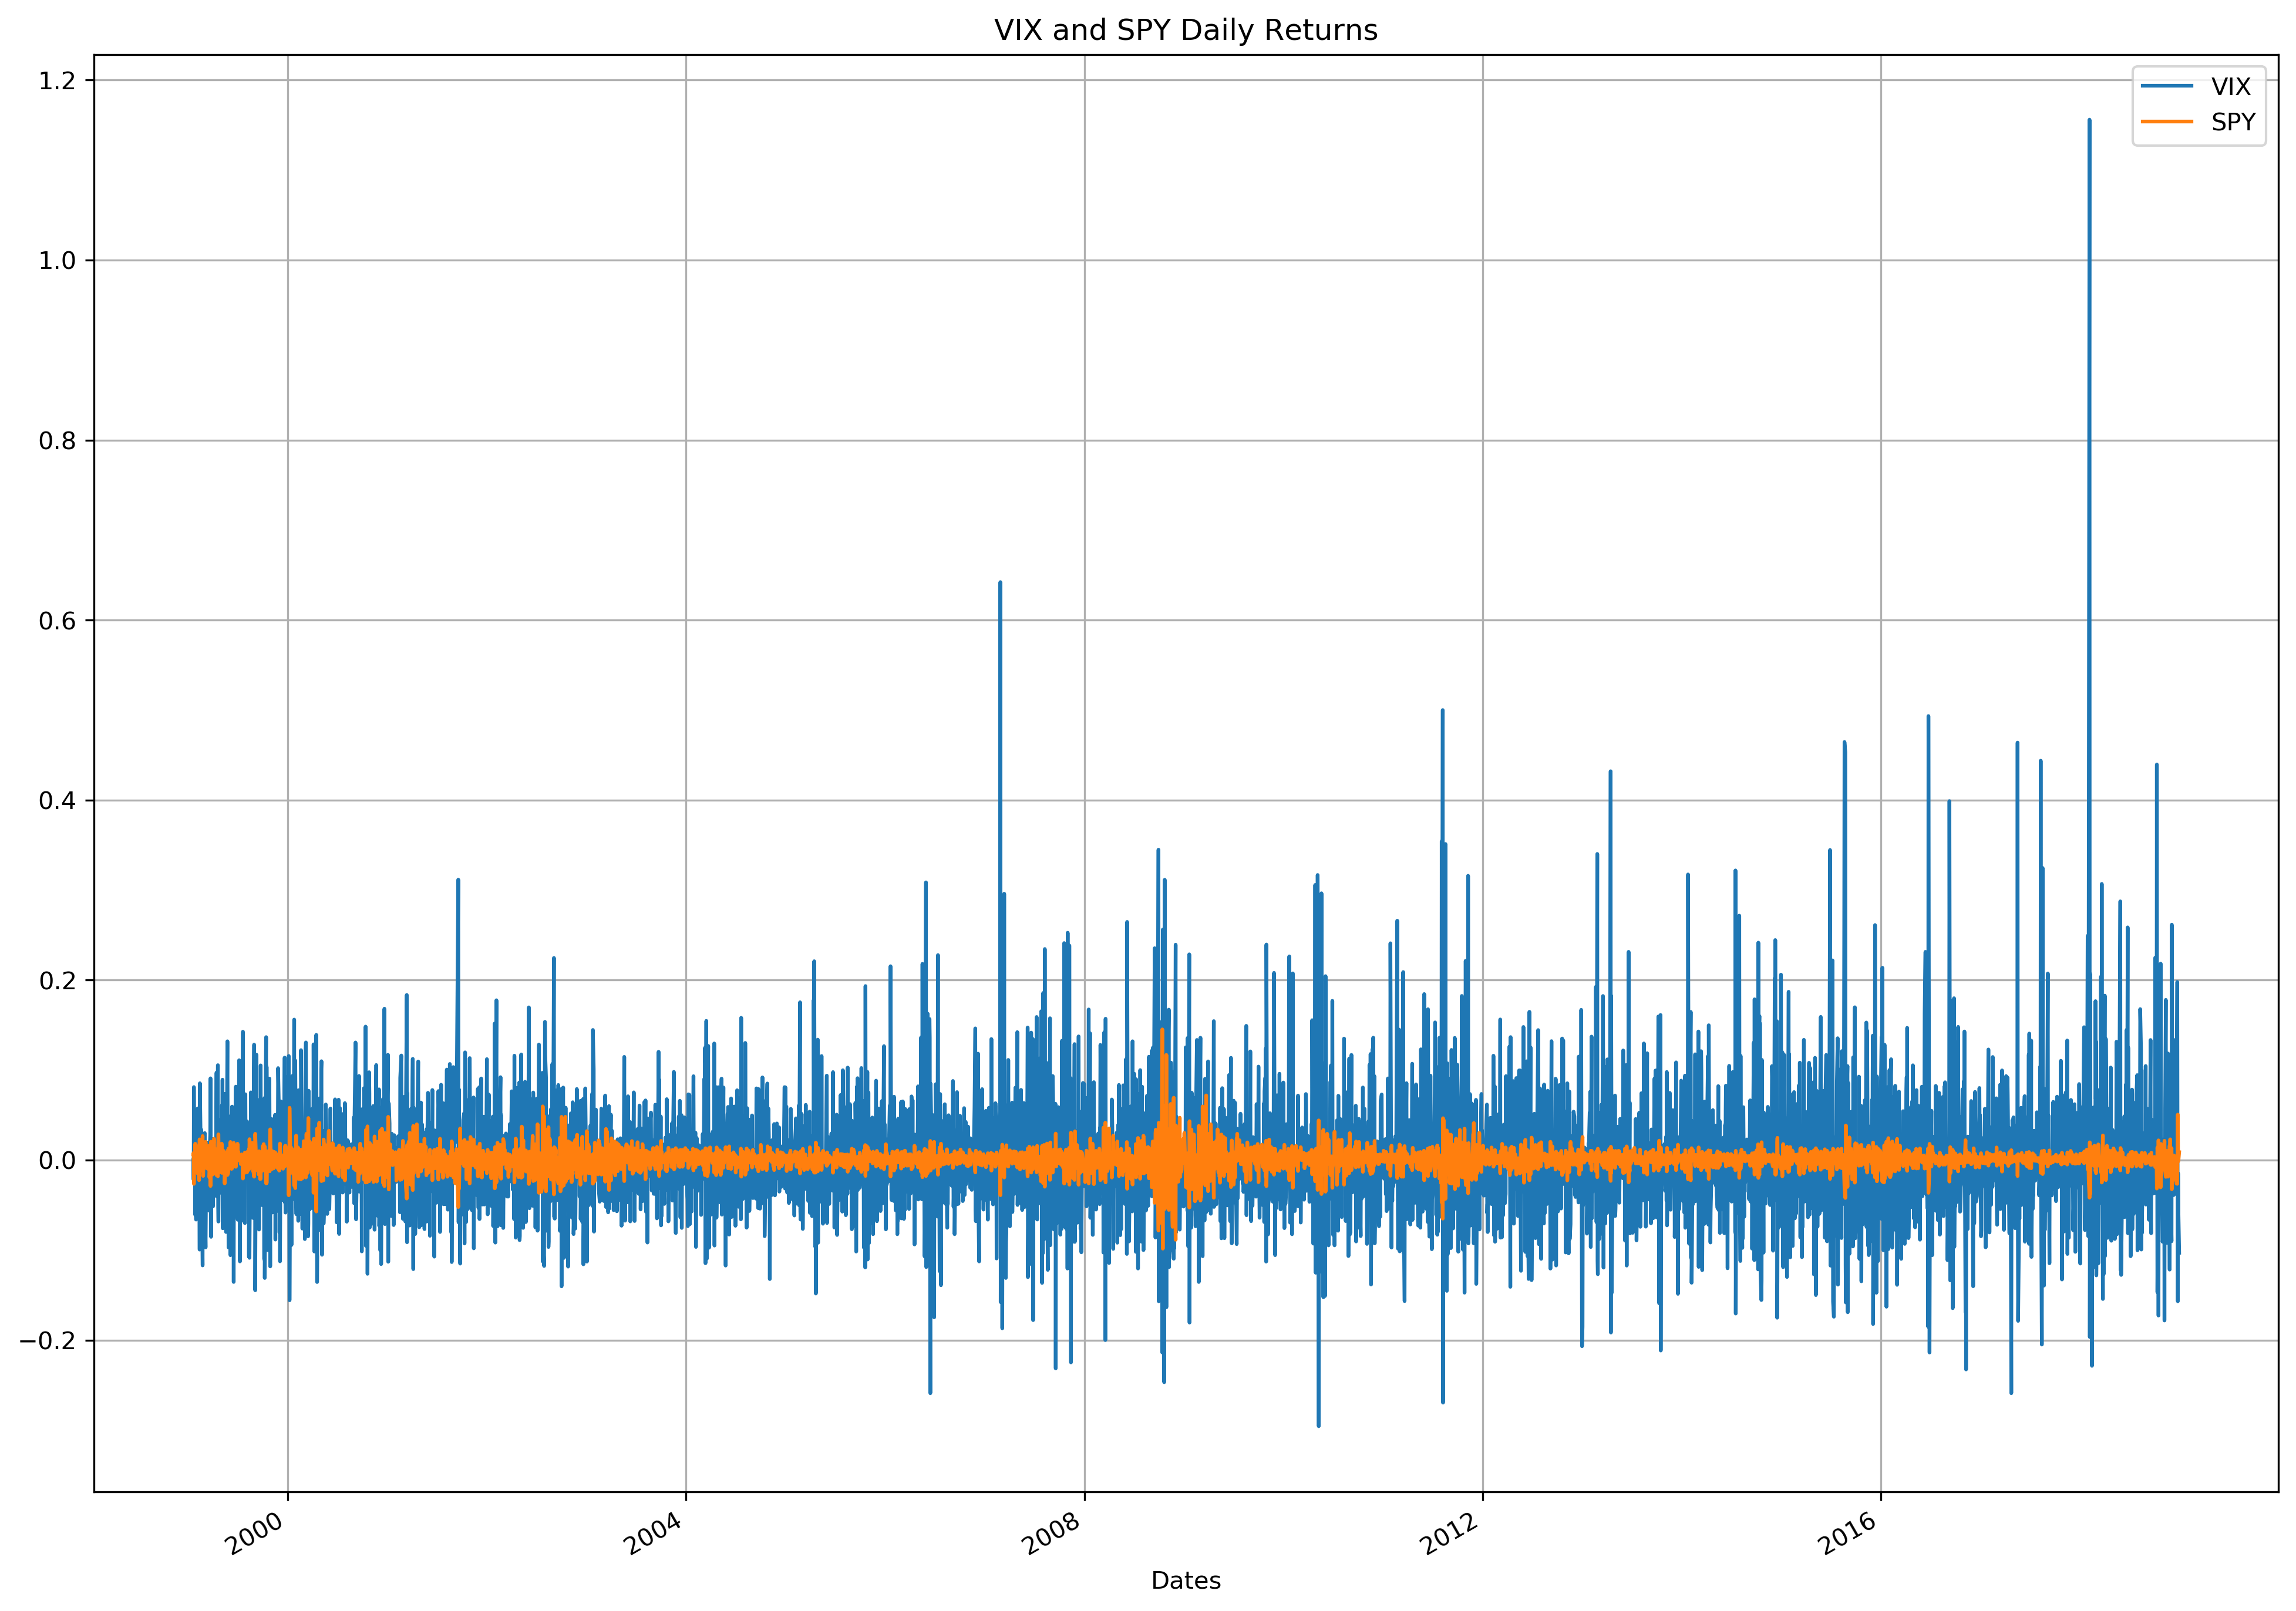

<IPython.core.display.Javascript object>

In [8]:
fig, ax = plt.subplots(1, 1)

vix_returns.rename({"daily_returns": "VIX"}, axis=1).plot.line(ax=ax)
spy_returns.rename({"daily_returns": "SPY"}, axis=1).plot.line(ax=ax)

plt.title("VIX and SPY Daily Returns")
plt.legend()
plt.grid(True)
plt.show()

### 2. Calculate the sample moments (mean,skewness, and kurtosis) for the VIX daily returns

In [9]:
vix_returns.mean()

daily_returns    0.002357
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
vix_returns.skew()

daily_returns    2.014783
dtype: float64

<IPython.core.display.Javascript object>

In [11]:
vix_returns.kurtosis()

daily_returns    19.302523
dtype: float64

<IPython.core.display.Javascript object>

### 3. Test whether the VIX daily returns were normally distributed or not. (Need to generate necessary figures and statistics for normality test, describe your observations before make any conclusion)

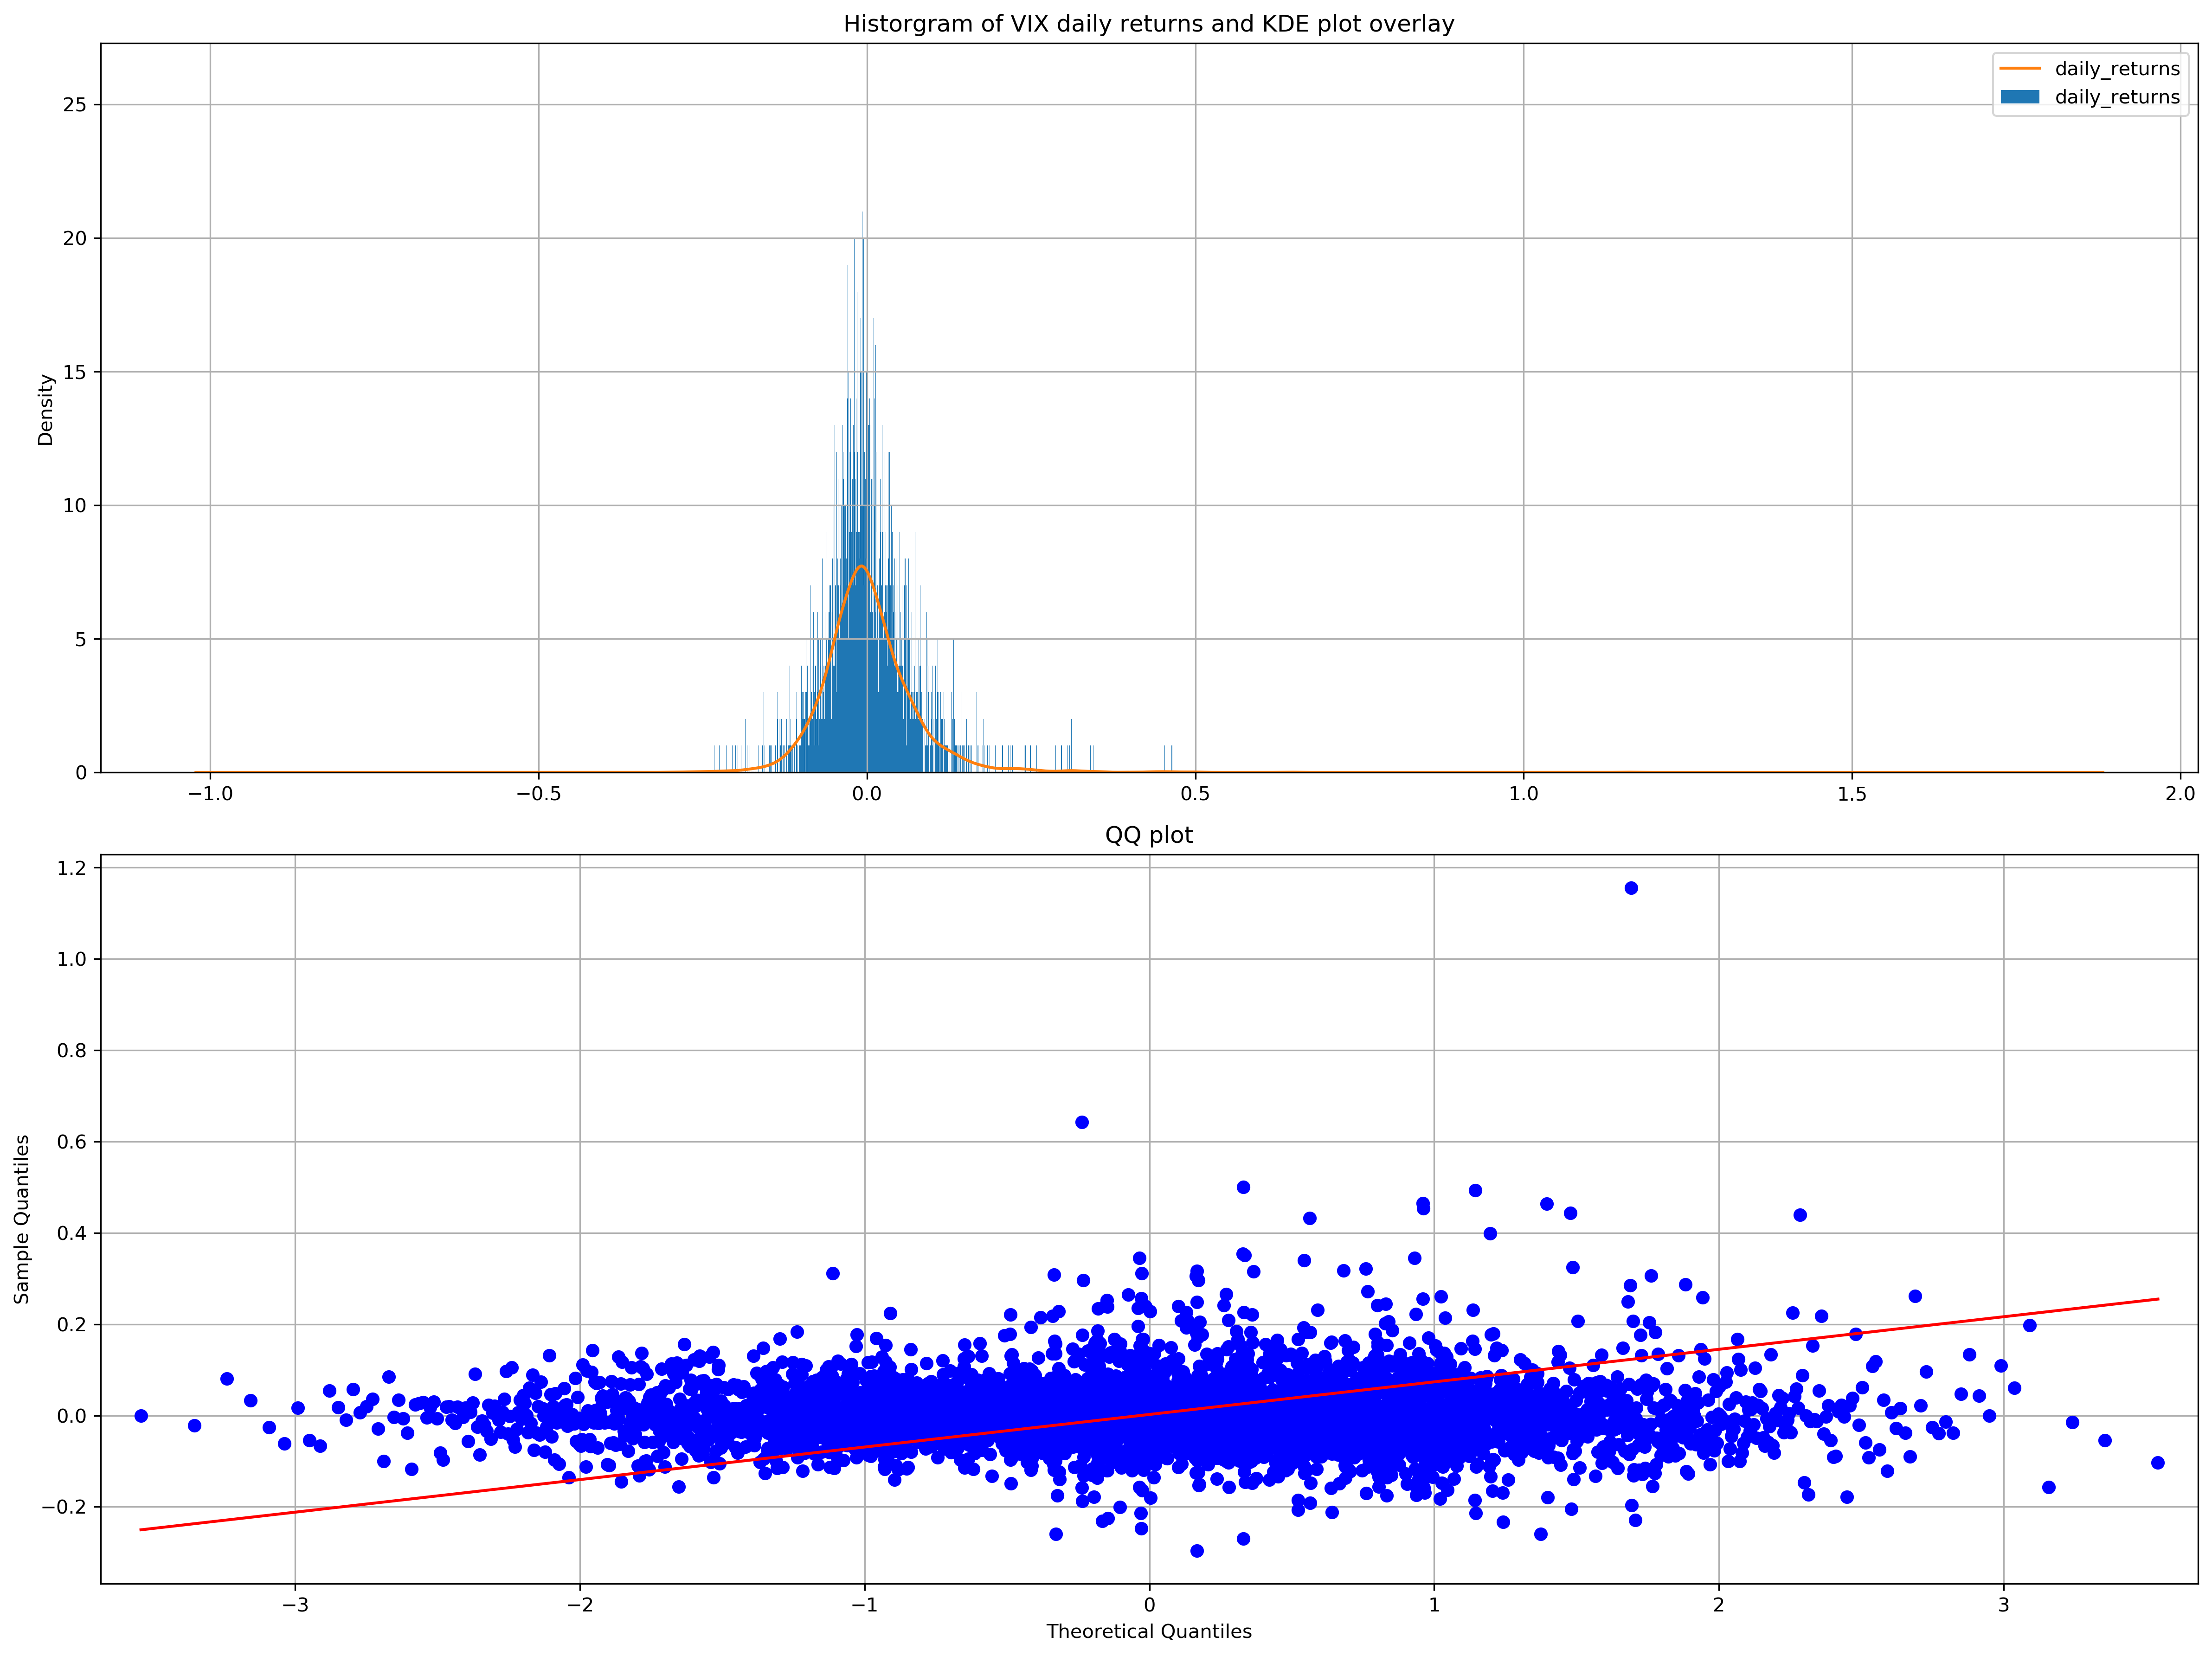

<IPython.core.display.Javascript object>

In [12]:
fig, ax = plt.subplots(2, 1)

vix_returns.plot.hist(bins=5000, ax=ax[0])
vix_returns.plot.kde(ax=ax[0])
ax[0].set_title("Historgram of VIX daily returns and KDE plot overlay")
ax[0].grid(True)

qqplot(vix_returns, line="s", ax=ax[1])
ax[1].set_title("QQ plot")
ax[1].grid(True)

plt.tight_layout()
plt.show()

Although visually, the histogram and kernel density estimation makes the VIX daily returns look normally distributed, let's use a statistical test to verify.

### Shapiro-Wilk Test

In [13]:
α = 0.05
sw_stat, p_val = sp.stats.shapiro(vix_returns)
print(f"H_0: Vix is drawn from a Normal Distribution")
print(f"H_α: Vix is not from a Normal Distribution")
print(
    f"Failed to reject H_0 as p-value ({p_val}) @ {α*100}% significance level"
    if p_val > α
    else f"H_0 is rejected as p-value ({p_val}) @ {α*100}% significance level"
)

H_0: Vix is drawn from a Normal Distribution
H_α: Vix is not from a Normal Distribution
H_0 is rejected as p-value (0.0) @ 5.0% significance level


/opt/anaconda3/envs/ml/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<IPython.core.display.Javascript object>

### D’Agostino’s $K^2$ Test

In [14]:
α = 0.05
sw_stat, p_val = sp.stats.normaltest(vix_returns)
print(f"H_0: Vix is drawn from a Normal Distribution")
print(f"H_α: Vix is not from a Normal Distribution")
print(
    f"Failed to reject H_0 as p-value ({p_val}) @ {α*100}% significance level"
    if p_val > α
    else f"H_0 is rejected as p-value ({p_val}) @ {α*100}% significance level"
)

H_0: Vix is drawn from a Normal Distribution
H_α: Vix is not from a Normal Distribution
H_0 is rejected as p-value ([0.]) @ 5.0% significance level


<IPython.core.display.Javascript object>

### Kolmogorov-Smirnov Test

In [15]:
α = 0.05
ks_stat, p_val = sp.stats.kstest(rvs=vix_returns, cdf="norm")
print(f"H_0: Vix is drawn from a Normal Distribution")
print(f"H_α: Vix is not from a Normal Distribution")
print(
    f"Failed to reject H_0 as p-value ({p_val}) @ {α*100}% significance level"
    if p_val > α
    else f"H_0 is rejected as p-value ({p_val}) @ {α*100}% significance level"
)

H_0: Vix is drawn from a Normal Distribution
H_α: Vix is not from a Normal Distribution
H_0 is rejected as p-value (0.0) @ 5.0% significance level


<IPython.core.display.Javascript object>

All 3 tests reveal that though visually, the VIX daily returns look normally distributed, they are not.

---

## Problem 2	
	
Data: 	the SPY ETF price times series on the tab DataSource.

### 1. Calculate rolling 252-day annualized SPY return volatilities, and plot the time series

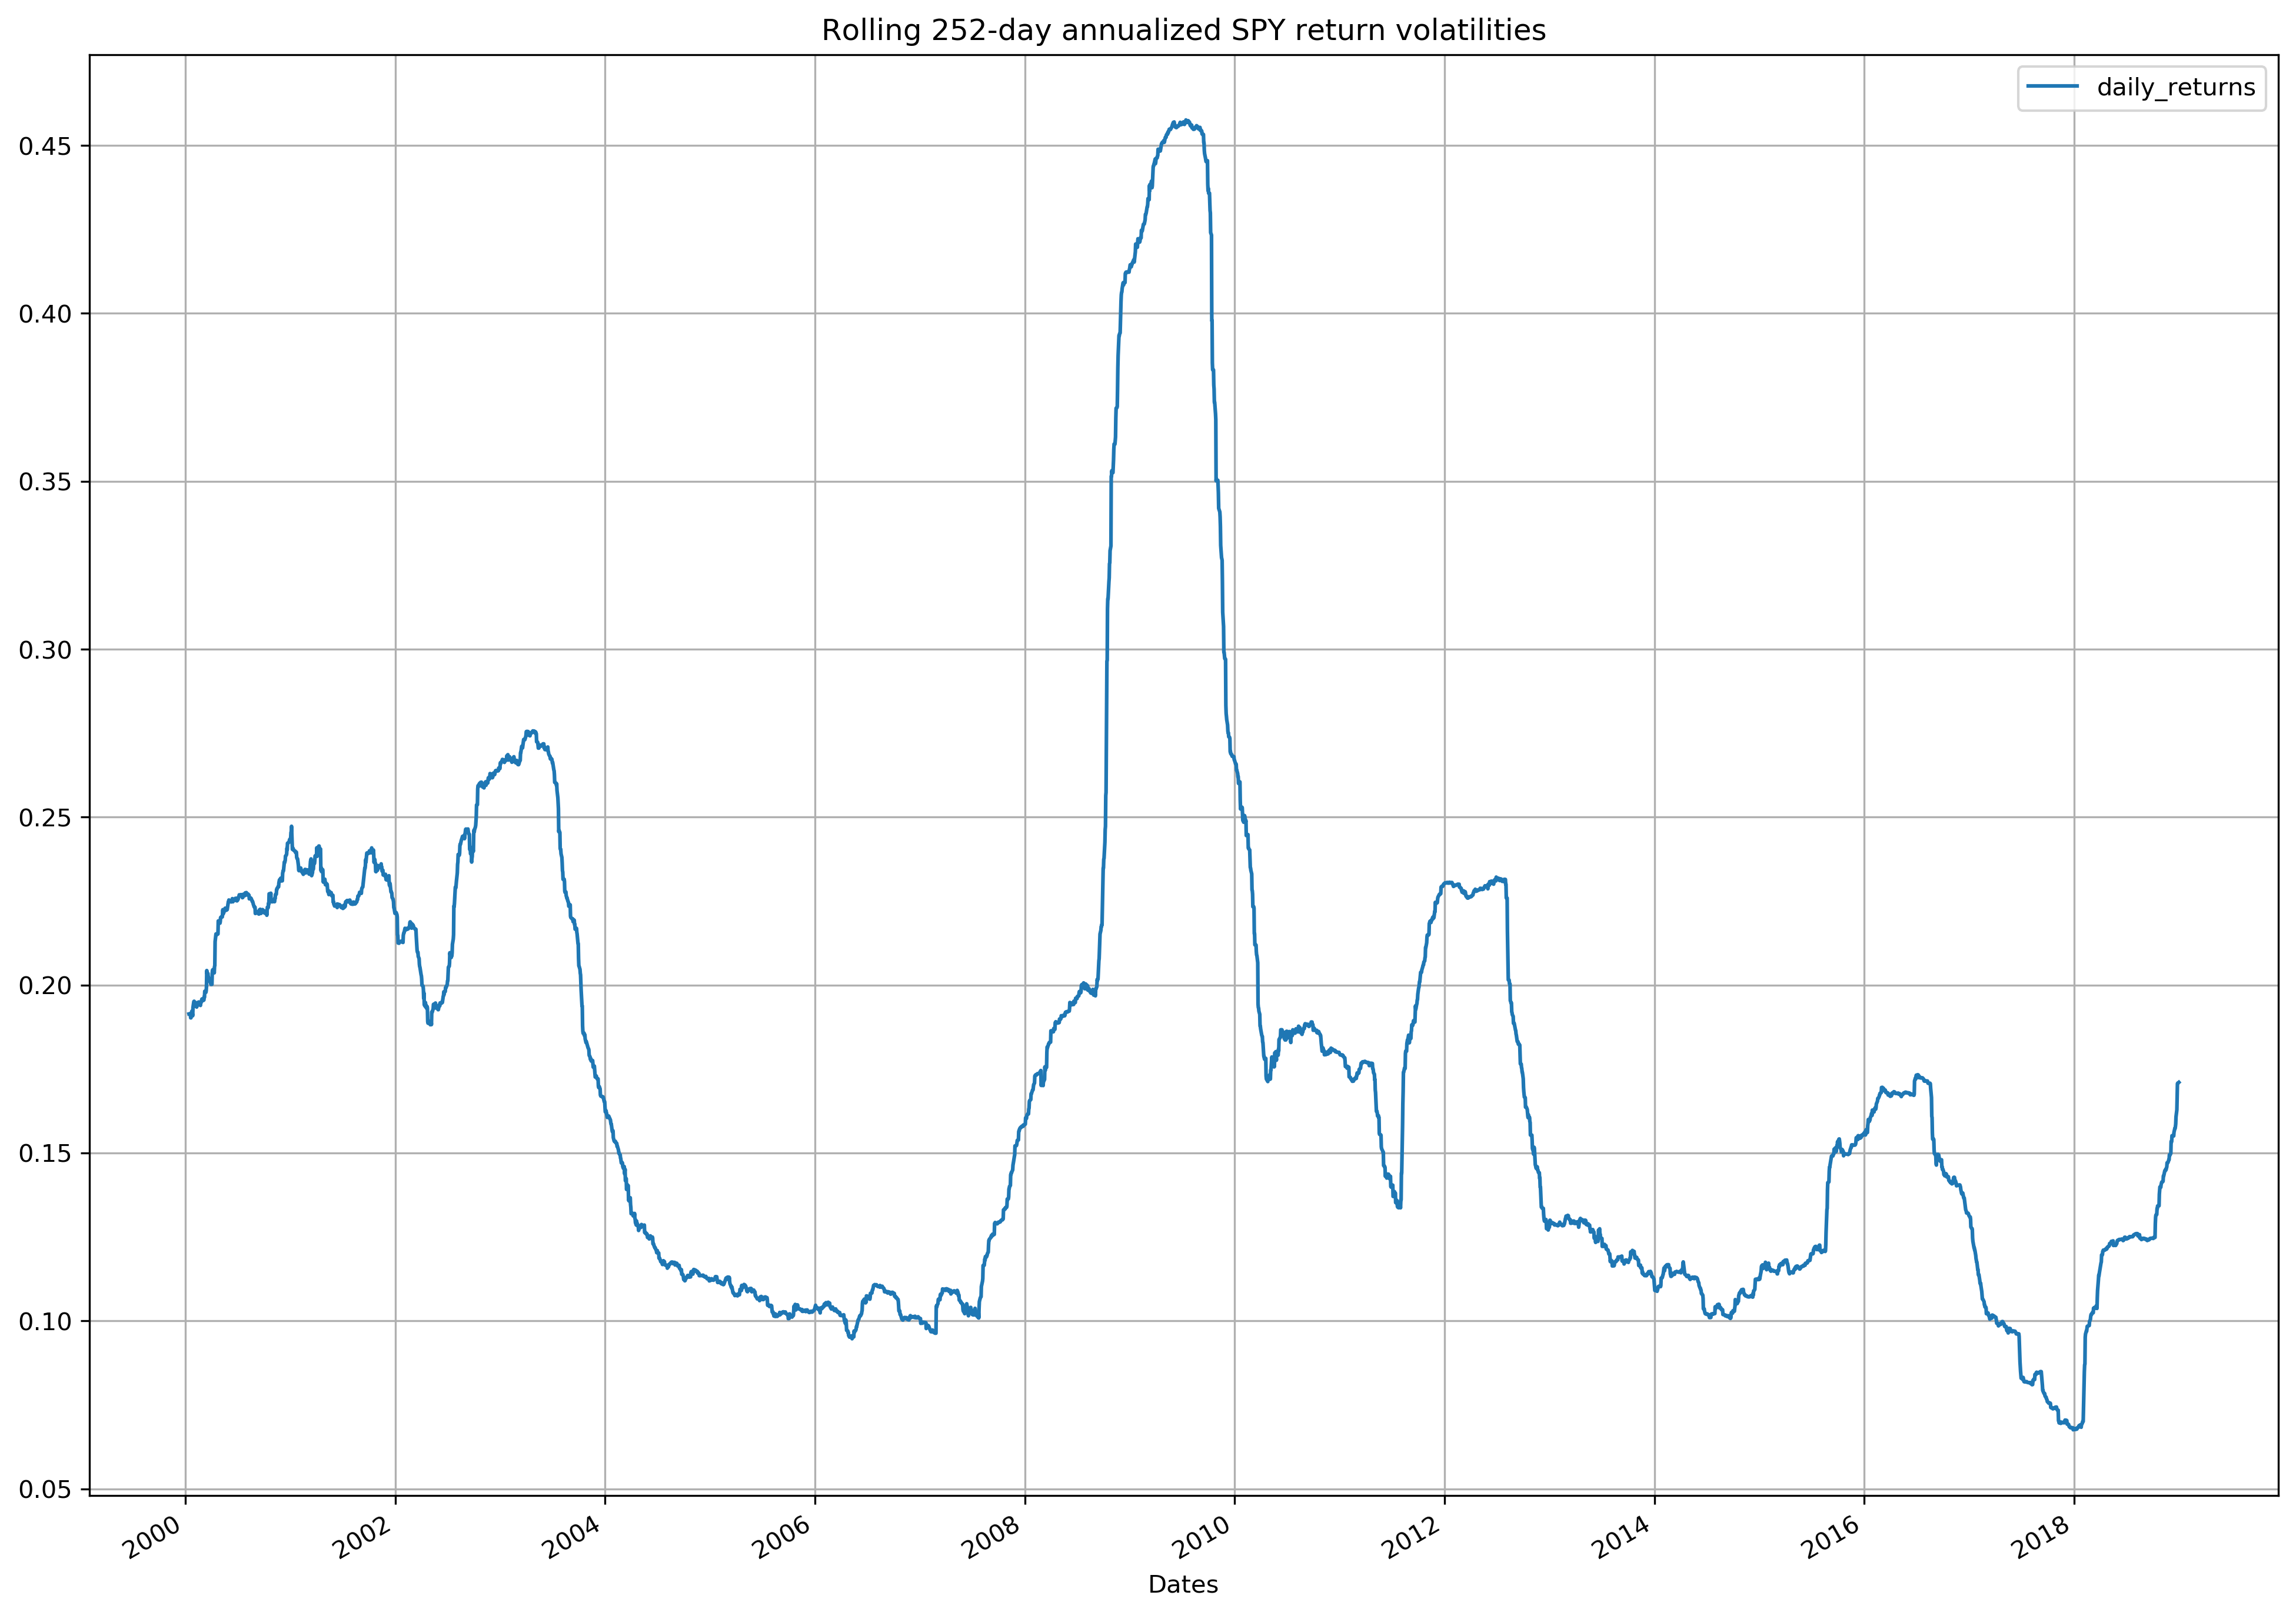

<IPython.core.display.Javascript object>

In [16]:
spy_returns.rolling(window=252).agg(
    lambda daily_returns: (252 ** 0.5) * daily_returns.std()
).iloc[252 - 1 :].plot.line()

plt.title("Rolling 252-day annualized SPY return volatilities")
plt.grid(True)
plt.show()

### 2. Calculate rolling 252-day annualized SPY return semi-volatility (based on negative daily returns) , and plot the time series

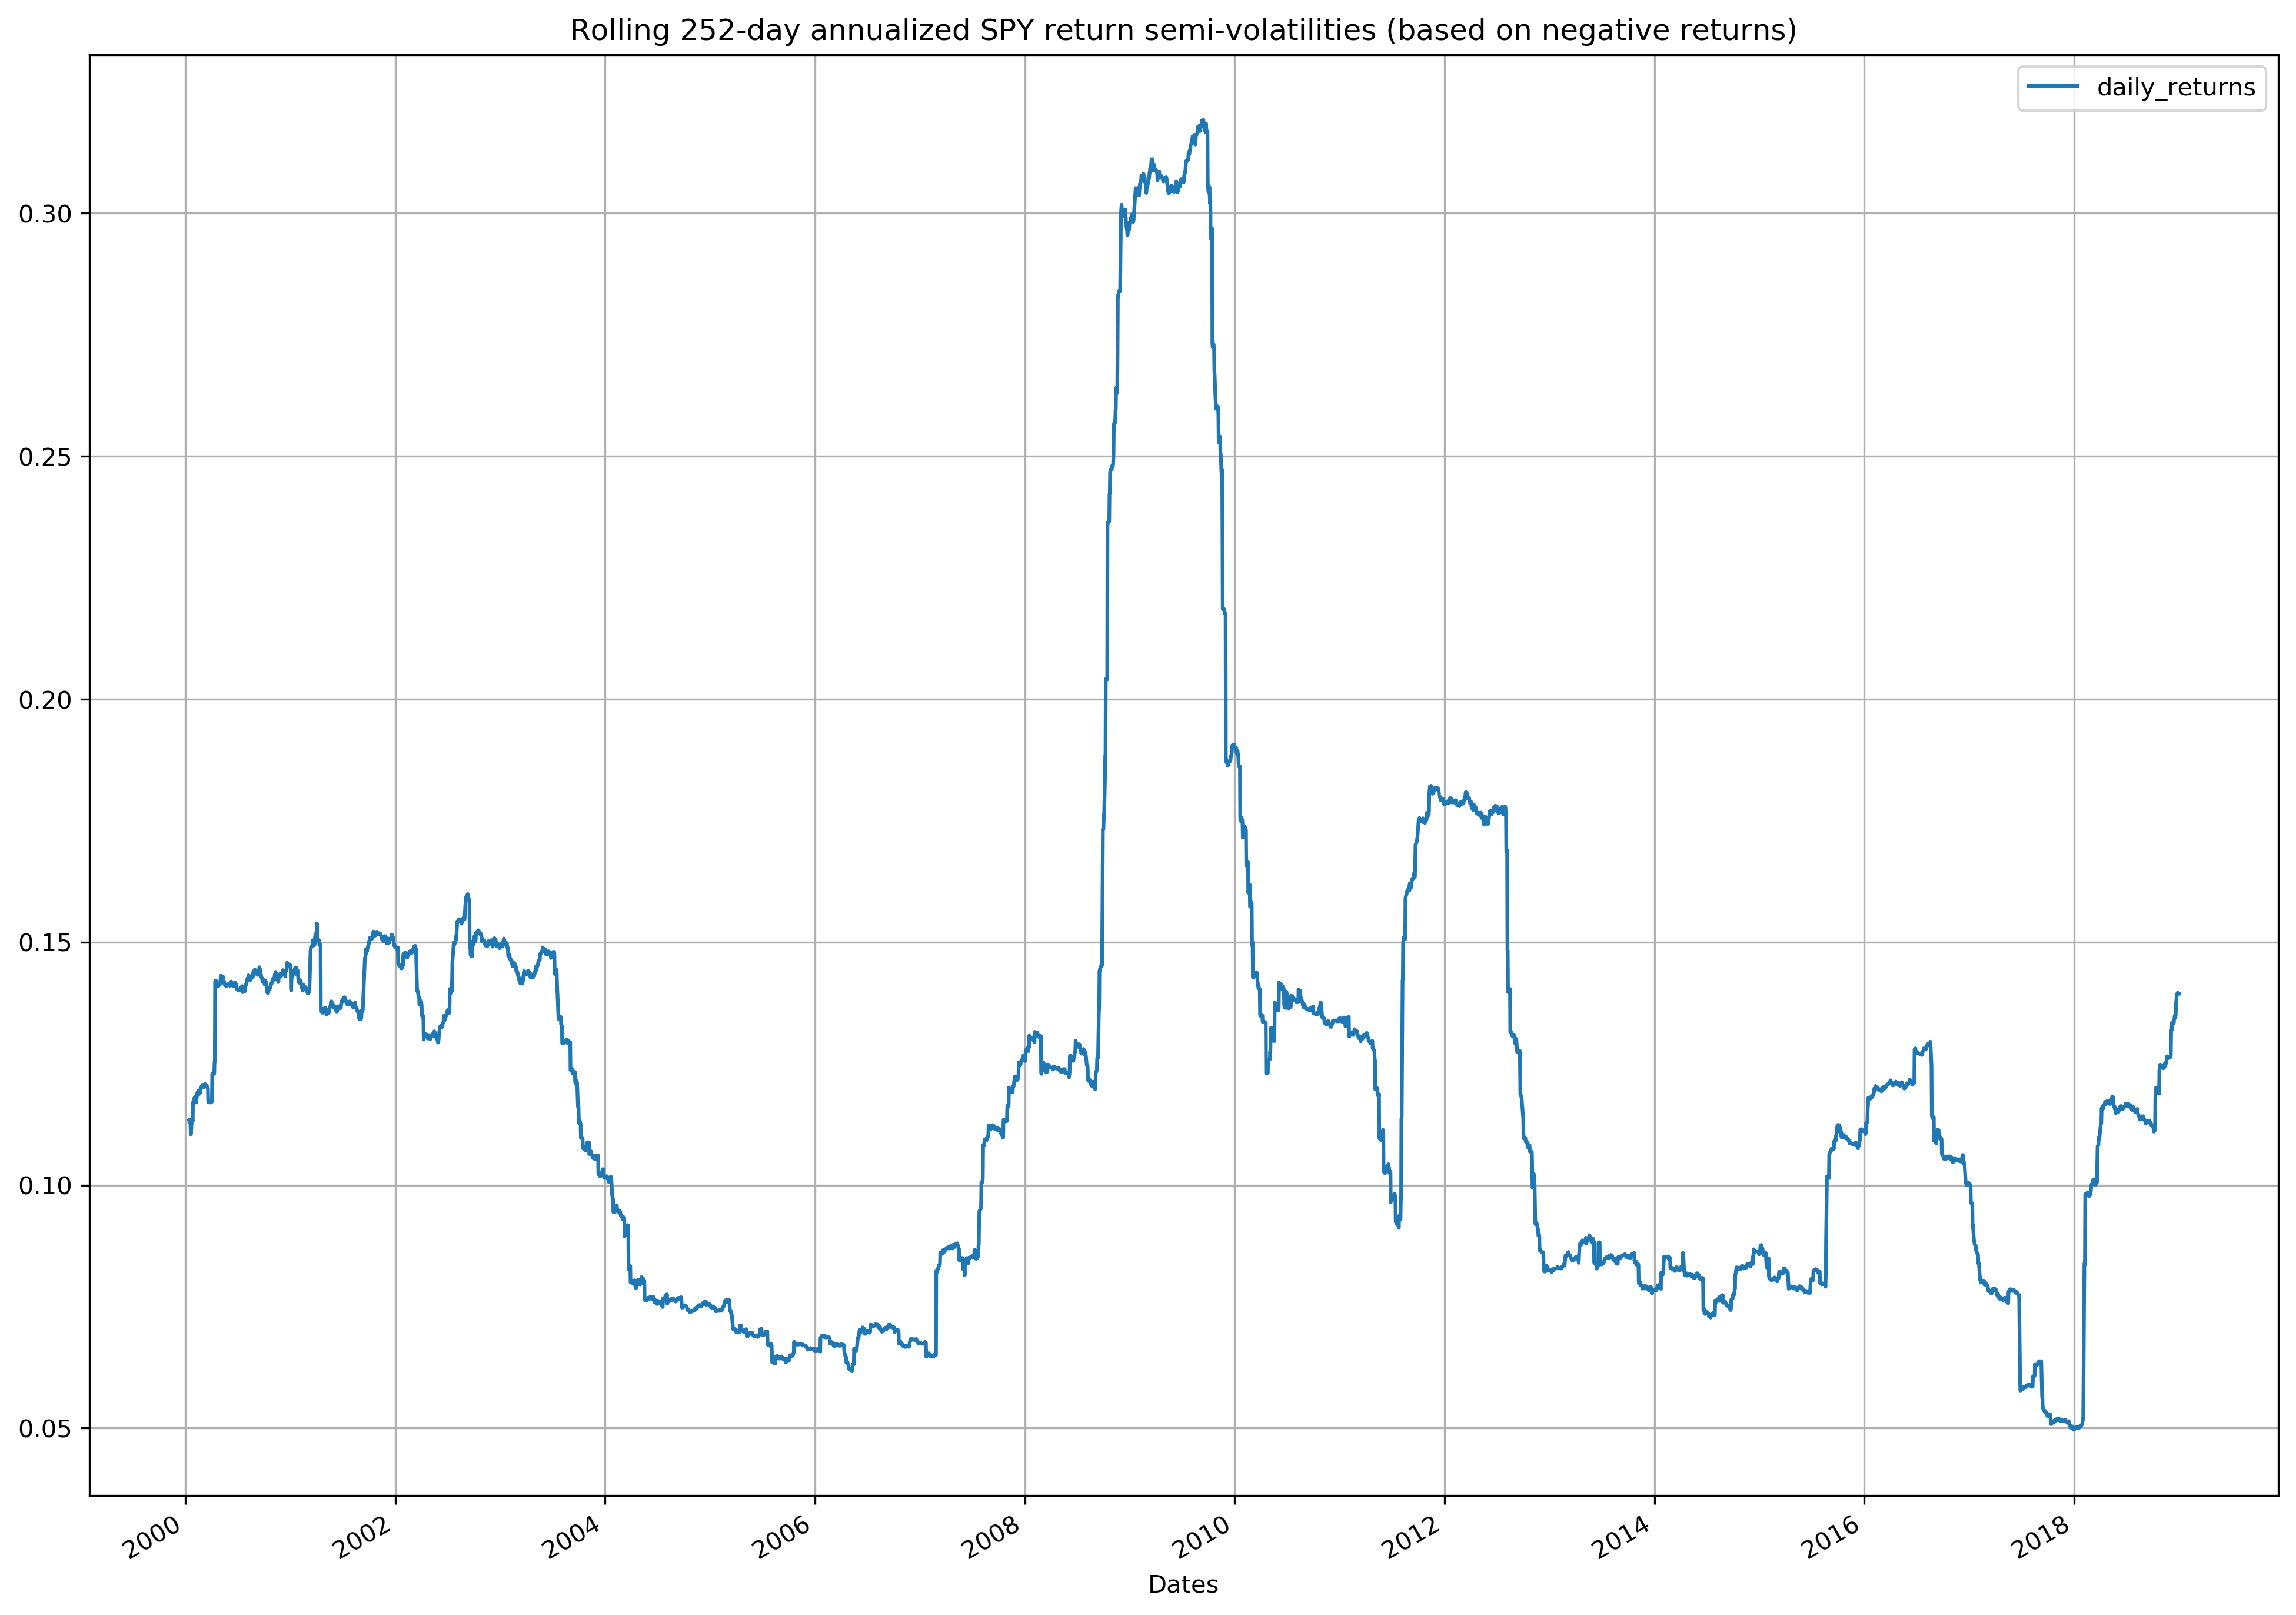

<IPython.core.display.Javascript object>

In [17]:
spy_returns.rolling(window=252).agg(
    lambda daily_returns: (252 ** 0.5) * daily_returns[daily_returns < 0].std()
).iloc[252 - 1 :].plot.line()

plt.title(
    "Rolling 252-day annualized SPY return semi-volatilities (based on negative returns)"
)
plt.grid(True)
plt.show()

### 3. Based on SPY daily returns in 2018, A). calculate its shortfall probability for a daily return less than -2%; B). Value at Risk at 95% for daily return; C). CVaR-95% for daily return.

In [18]:
print(
    f"A) Shortfall Probaility for Daily Return < -2%: {np.round((spy_returns.loc['2018'] < -0.02).mean().values[0], 2)}"
)
print(
    f"B) Value at Risk at 95% for daily return: {np.round(spy_returns.loc['2018'].quantile(q=0.05).values[0]*100, 2)}%"
)
print(
    f"B) Value at Risk at 95% for daily return (Parametric): {np.round(sp.stats.norm.ppf(0.05, spy_returns.loc['2018'].mean(), spy_returns.loc['2018'].std())[0]*100, 2)}%"
)
print(
    f"C) CVaR-95% for daily return: {np.round(spy_returns.loc['2018'][spy_returns.loc['2018'] <= spy_returns.loc['2018'].quantile(q=0.05)].mean().values[0]*100, 2)}%"
)

A) Shortfall Probaility for Daily Return < -2%: 0.06
B) Value at Risk at 95% for daily return: -2.14%
B) Value at Risk at 95% for daily return (Parametric): -1.8%
C) CVaR-95% for daily return: -2.79%


<IPython.core.display.Javascript object>

### 4. Calculate drawdowns for the SPY price times series, plot the drawdown time series, and locate the maximum drawdown for the whole period

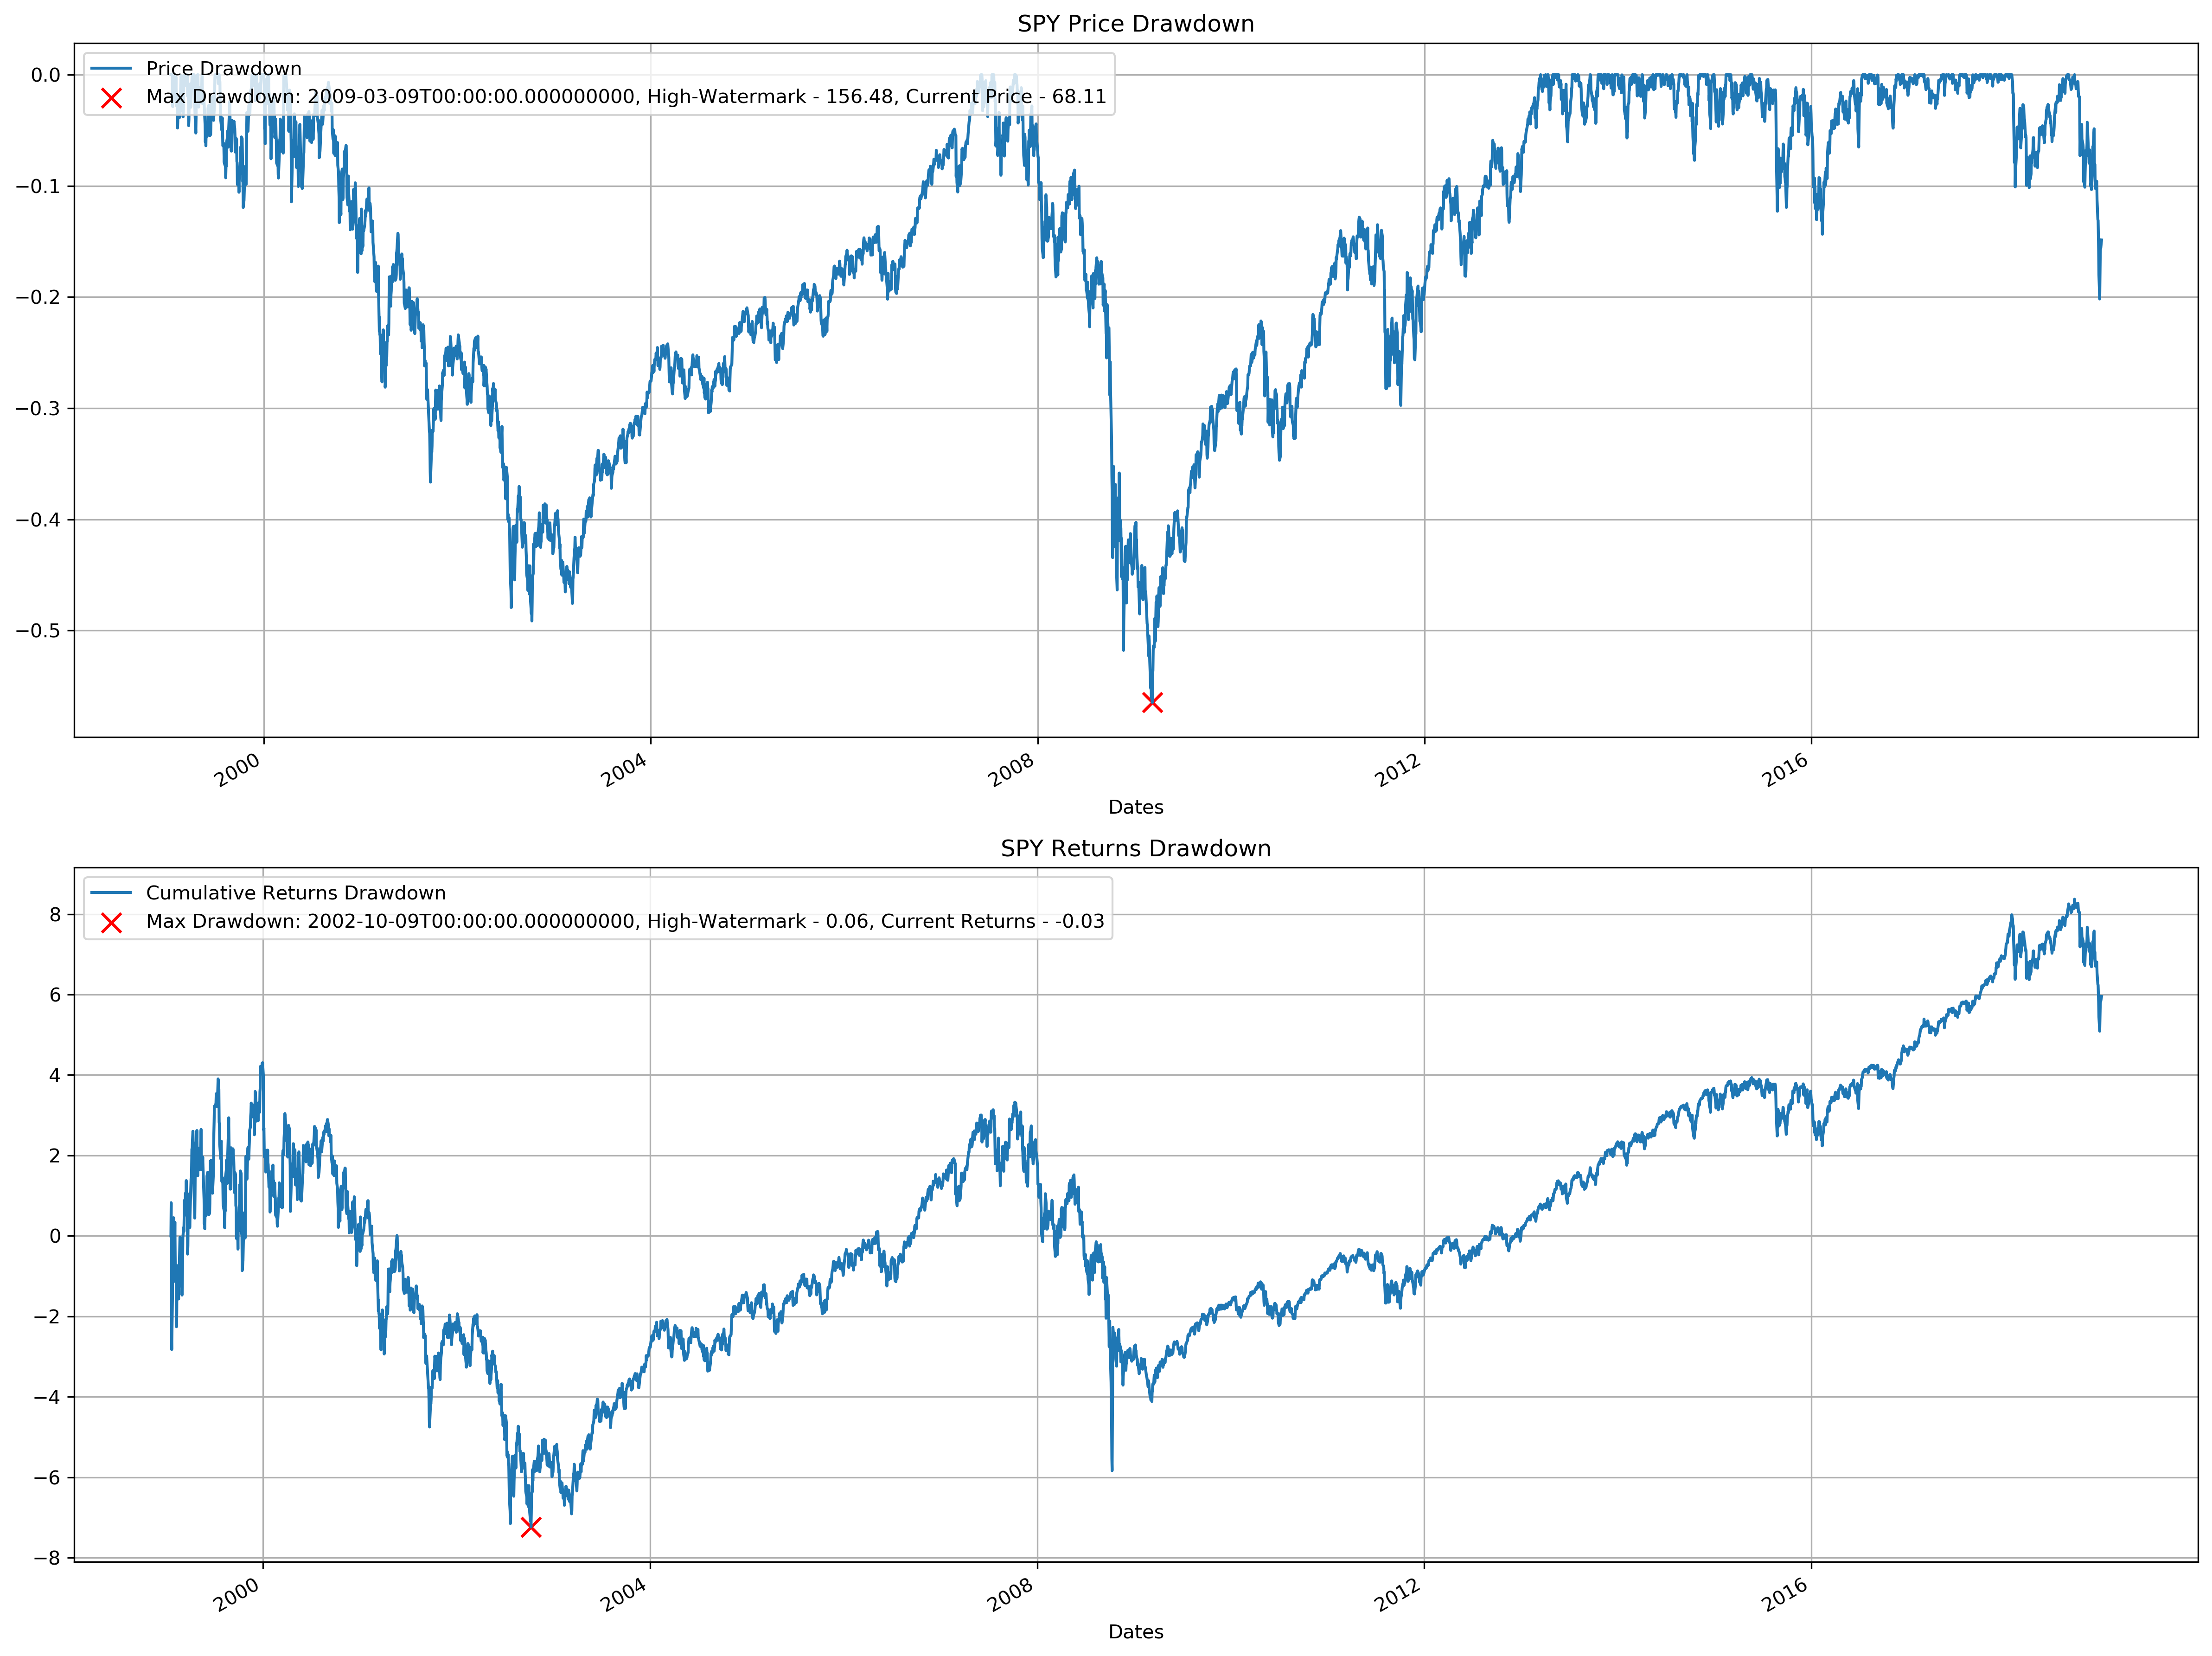

<IPython.core.display.Javascript object>

In [19]:
fig, ax = plt.subplots(2, 1)

# Current SPY price / Largest SPY Price seen so far
spy_price_highwatermark = np.maximum.accumulate(spy)
spy_price_drawdown = (spy / spy_price_highwatermark - 1).rename(
    {"Price": "Price Drawdown"}, axis=1
)
spy_price_drawdown.plot.line(ax=ax[0])
ax[0].scatter(
    spy_price_drawdown.idxmin(),
    spy_price_drawdown.min(),
    s=100,
    c="red",
    marker="x",
    label=f"Max Drawdown: {spy_price_drawdown.idxmin().values[0]}, High-Watermark - {np.round(spy_price_highwatermark.loc[spy_price_drawdown.idxmin()].values[0][0], 2)}, Current Price - {np.round(spy.loc[spy_price_drawdown.idxmin()].values[0][0], 2)}",
)
ax[0].set_title("SPY Price Drawdown")
ax[0].legend(loc=2)
ax[0].grid(True)

# Current Cum. returns / Largest Cum. returns so far
spy_returns_highwatermark = np.maximum.accumulate(spy_returns)
spy_cumreturns = np.cumprod(1 + spy_returns) - 1
spy_returns_drawdown = (spy_cumreturns / spy_returns_highwatermark) - 1
spy_returns_drawdown = spy_returns_drawdown.rename(
    {"daily_returns": "Cumulative Returns Drawdown"}, axis=1
)
spy_returns_drawdown.plot.line(ax=ax[1])
ax[1].scatter(
    spy_returns_drawdown.idxmin(),
    spy_returns_drawdown.min(),
    s=100,
    c="red",
    marker="x",
    label=f"Max Drawdown: {spy_returns_drawdown.idxmin().values[0]}, High-Watermark - {np.round(spy_returns_highwatermark.loc[spy_returns_drawdown.idxmin()].values[0][0], 2)}, Current Returns - {np.round(spy_returns.loc[spy_returns_drawdown.idxmin()].values[0][0], 2)}",
)
ax[1].set_title("SPY Returns Drawdown")
ax[1].legend(loc=2)
ax[1].grid(True)
plt.tight_layout()
plt.show()

---

## Problem 3

Data: 	Multi-Asset Class Monthly Returns on Datasource_CAPMAssetClasses

Assumptions:
1. No risk-free asset in the investable universe and all the risky assets are given on Datasource_CAPMAssetClasses;
2. Use historical covariance matrix and historical returns to estimate covariance matrix and expected return vector (see on lecture 2 notes)
3. No short-sell allowed. (before we have no such constraint)

In [20]:
data = pd.read_excel(
    "./data/HW1_Due20200927.xlsx", sheet_name="DataSource_CAPMAssetClasses", header=[1],
).dropna(
    how="all", axis=1
)  # I'm assuming all of the values here are monthly returns in percentage
data = data.rename({"Period Ending": "Date"}, axis=1).set_index("Date") / 100
data.head()

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Date,,,,,,,,,,,,
1999-01-31,0.011644,0.0071,0.0135,-0.0157,0.0587,0.0080,0.0450,-0.0227,-0.0030,-0.015075,0.0044,-0.026855
1999-02-28,-0.006987,-0.0175,-0.0068,-0.0351,-0.0457,-0.0141,-0.0915,-0.0683,-0.0238,0.009635,-0.0460,-0.016449
1999-03-31,-0.000145,0.0055,0.0116,0.0019,0.0527,0.0207,0.0356,-0.0082,0.0417,0.132146,0.1688,-0.005460
1999-04-30,0.006619,0.0032,0.0183,-0.0015,0.0013,0.0934,0.0883,0.0913,0.0405,0.123700,0.0413,0.096692
1999-05-31,0.006887,-0.0088,-0.0092,-0.0202,-0.0307,-0.0110,0.0016,0.0307,-0.0515,-0.005800,-0.0546,0.021194


<IPython.core.display.Javascript object>

### Expected Annualized Returns & Covariance Matrix

In [21]:
μ = (data + 1).prod() ** (12 / data.notnull().sum()) - 1  # Annualized Returns
Σ = data.cov() * 12  # Annualized Covariance matrix

<IPython.core.display.Javascript object>

### 1. Run an optimization to locate the minimum-variance portfolio on the new frontier.

\begin{align}
    \text{minimize } &w^\top \Sigma w \\
    \text{subject to } 
    &w^\top \mathbb{1} = 1 \\
    &w \geq 0 \\
\end{align}

In [22]:
w_minvar = cp.Variable((len(data.columns),), integer=False)
constraints = [
    w_minvar.T @ np.ones((w_minvar.shape[0],)) == 1,
    w_minvar >= 0,  # No short-selling allowed
]

# Form objective.
obj = cp.Minimize(cp.quad_form(w_minvar, Σ))

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()
print("Quadratic Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"Variance of Minimum-Variance Portfolio: {np.round(prob.value, 5)}")
print(
    f"Expected Annualized Return of Minimum-Variance Portfolio: {np.round(w_minvar.value.T@μ, 5)}"
)
print("The optimal portfolio weights:")
print(
    "\t"
    + "\n\t".join(
        [
            security + ": " + str(np.abs(np.round(w_minvar_i, 2)))
            for security, w_minvar_i in zip(data.columns, w_minvar.value)
        ]
    )
)

Quadratic Programming Solution
Status: optimal
Variance of Minimum-Variance Portfolio: 0.00103
Expected Annualized Return of Minimum-Variance Portfolio: 0.04577
The optimal portfolio weights:
	Bloomberg Barclays - U.S. TIPS Index: 0.0
	Bloomberg Barclays - U.S. Aggregate Index: 0.93
	BofA Merrill Lynch - U.S. High Yield Index: 0.0
	FTSE - Non U.S. Govt Bond Index ($): 0.0
	Russell - 1000 Growth Index: 0.01
	Russell - 1000 Value Index: 0.04
	Russell - 2000 Growth Index: 0.01
	Russell - 2000 Value Index: 0.0
	MSCI - EAFE Index ($Net): 0.0
	MSCI - Emerging Markets Index ($ Net): 0.0
	S&P - GSCI Total Index: 0.01
	MSCI - U.S. REIT Index: 0.0


<IPython.core.display.Javascript object>

### 2A. Run optimizations to locate two other efficient portfolios different than the minimum-variance portfolio

\begin{align}
    \text{maximize } &w^\top \mu \\
    \text{subject to } 
    &w^\top \Sigma w \leq \sigma^2 \\
    &w^\top \mathbb{1} = 1 \\
    &w \geq 0 \\
\end{align}

#### 1. Risk-level Upperbound $σ \leq 0.05$

In [23]:
σ_1 = 0.05
w_σ_1 = cp.Variable((len(data.columns),), integer=False)
constraints = [
    cp.quad_form(w_σ_1, Σ) <= σ_1 ** 2,
    w_σ_1.T @ np.ones((w_σ_1.shape[0],)) == 1,
    w_σ_1 >= 0,  # No short-selling allowed
]

# Form objective.
obj = cp.Maximize(w_σ_1.T @ μ)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()
print("Quadratic Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(
    f"Variance of Max Expected Return with σ <= {σ_1} Portfolio: {np.round(cp.quad_form(w_σ_1, Σ).value, 5)}"
)
print(
    f"Expected Annualized Return of Max Expected Return with σ <= {σ_1} Portfolio: {np.round(prob.value, 5)}"
)
print("The optimal portfolio weights:")
print(
    "\t"
    + "\n\t".join(
        [
            security + ": " + str(np.abs(np.round(w_σ_1_i, 2)))
            for security, w_σ_1_i in zip(data.columns, w_σ_1.value)
        ]
    )
)

Quadratic Programming Solution
Status: optimal
Variance of Max Expected Return with σ <= 0.05 Portfolio: 0.0025
Expected Annualized Return of Max Expected Return with σ <= 0.05 Portfolio: 0.05637
The optimal portfolio weights:
	Bloomberg Barclays - U.S. TIPS Index: 0.27
	Bloomberg Barclays - U.S. Aggregate Index: 0.43
	BofA Merrill Lynch - U.S. High Yield Index: 0.14
	FTSE - Non U.S. Govt Bond Index ($): 0.0
	Russell - 1000 Growth Index: 0.0
	Russell - 1000 Value Index: 0.0
	Russell - 2000 Growth Index: 0.0
	Russell - 2000 Value Index: 0.11
	MSCI - EAFE Index ($Net): 0.0
	MSCI - Emerging Markets Index ($ Net): 0.0
	S&P - GSCI Total Index: 0.0
	MSCI - U.S. REIT Index: 0.05


<IPython.core.display.Javascript object>

#### 2. Risk-level Upperbound $σ \leq 1.00$

In [24]:
σ_2 = 1
w_σ_2 = cp.Variable((len(data.columns),), integer=False)
constraints = [
    cp.quad_form(w_σ_2, Σ) <= σ_2 ** 2,
    w_σ_2.T @ np.ones((w_σ_2.shape[0],)) == 1,
    w_σ_2 >= 0,  # No short-selling allowed
]

# Form objective.
obj = cp.Maximize(w_σ_2.T @ μ)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()
print("Quadratic Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(
    f"Variance of Max Expected Return with σ <= {σ_2} Portfolio: {np.round(cp.quad_form(w_σ_2, Σ).value, 5)}"
)
print(
    f"Expected Annualized Return of Max Expected Return with σ <= {σ_2} Portfolio: {np.round(prob.value, 5)}"
)
print("The optimal portfolio weights:")
print(
    "\t"
    + "\n\t".join(
        [
            security + ": " + str(np.abs(np.round(w_σ_2_i, 2)))
            for security, w_σ_2_i in zip(data.columns, w_σ_2.value)
        ]
    )
)

Quadratic Programming Solution
Status: optimal
Variance of Max Expected Return with σ <= 1 Portfolio: 0.04336
Expected Annualized Return of Max Expected Return with σ <= 1 Portfolio: 0.09651
The optimal portfolio weights:
	Bloomberg Barclays - U.S. TIPS Index: 0.0
	Bloomberg Barclays - U.S. Aggregate Index: 0.0
	BofA Merrill Lynch - U.S. High Yield Index: 0.0
	FTSE - Non U.S. Govt Bond Index ($): 0.0
	Russell - 1000 Growth Index: 0.0
	Russell - 1000 Value Index: 0.0
	Russell - 2000 Growth Index: 0.0
	Russell - 2000 Value Index: 0.0
	MSCI - EAFE Index ($Net): 0.0
	MSCI - Emerging Markets Index ($ Net): 0.0
	S&P - GSCI Total Index: 0.0
	MSCI - U.S. REIT Index: 1.0


<IPython.core.display.Javascript object>

### 2B. Prove or disprove the minimum-variance portfolio can be represented as a combination of the two portfolios found on 2A.

In [25]:
x = cp.Variable((2,), integer=False)
constraints = [x.T @ np.ones((2,)) == 1, x >= 0]

# Form objective.
obj = cp.Minimize(
    np.mean((((np.array([w_σ_1.value, w_σ_2.value])).T @ x) @ w_minvar.value) ** 2)
)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

2.016525880278835e-21

<IPython.core.display.Javascript object>

The minimum-variance portfolio cannot be represented as a combination of 2 portfolios as all 3 vectors are linearly independent.

### 3. Plot both the old efficient frontier without the short-sell constraint and the new efficient frontier with the short-sell constraint on the same graph.

In [26]:
# Two -Fund Theorem
w_minvar_shortsell_allowed = (np.linalg.inv(Σ) @ np.ones((Σ.shape[0],))) / (
    np.ones((Σ.shape[0],)).T @ np.linalg.inv(Σ) @ np.ones((Σ.shape[0],))
)

w_msr_shortsell_allowed = (np.linalg.inv(Σ) @ μ) / (
    np.ones((Σ.shape[0],)).T @ np.linalg.inv(Σ) @ μ
)

w_2_fund_theorem_shortsell_allowed = lambda α: np.array([α, 1 - α]).T @ np.array(
    [w_minvar_shortsell_allowed, w_msr_shortsell_allowed]
)
old_efficient_frontier = [
    (
        (
            w_2_fund_theorem_shortsell_allowed(α).T
            @ Σ
            @ w_2_fund_theorem_shortsell_allowed(α)
        )
        ** 0.5,
        w_2_fund_theorem_shortsell_allowed(α).T @ μ,
    )
    for α in np.arange(0, 1, 0.01)
]

<IPython.core.display.Javascript object>

In [27]:
new_efficient_frontier = []
for σ in np.linspace(0.01, 0.05, 500):
    w = cp.Variable((len(data.columns),), integer=False)
    constraints = [
        cp.quad_form(w, Σ) <= σ ** 2,
        w.T @ np.ones((w.shape[0],)) == 1,
        w >= 0,  # No short-selling allowed
    ]

    # Form objective.
    obj = cp.Maximize(w.T @ μ)

    # Form and solve problem.
    prob = cp.Problem(obj, constraints)
    prob.solve()

    if prob.status == "optimal":
        new_efficient_frontier.append((cp.quad_form(w, Σ).value ** 0.5, prob.value))

<IPython.core.display.Javascript object>

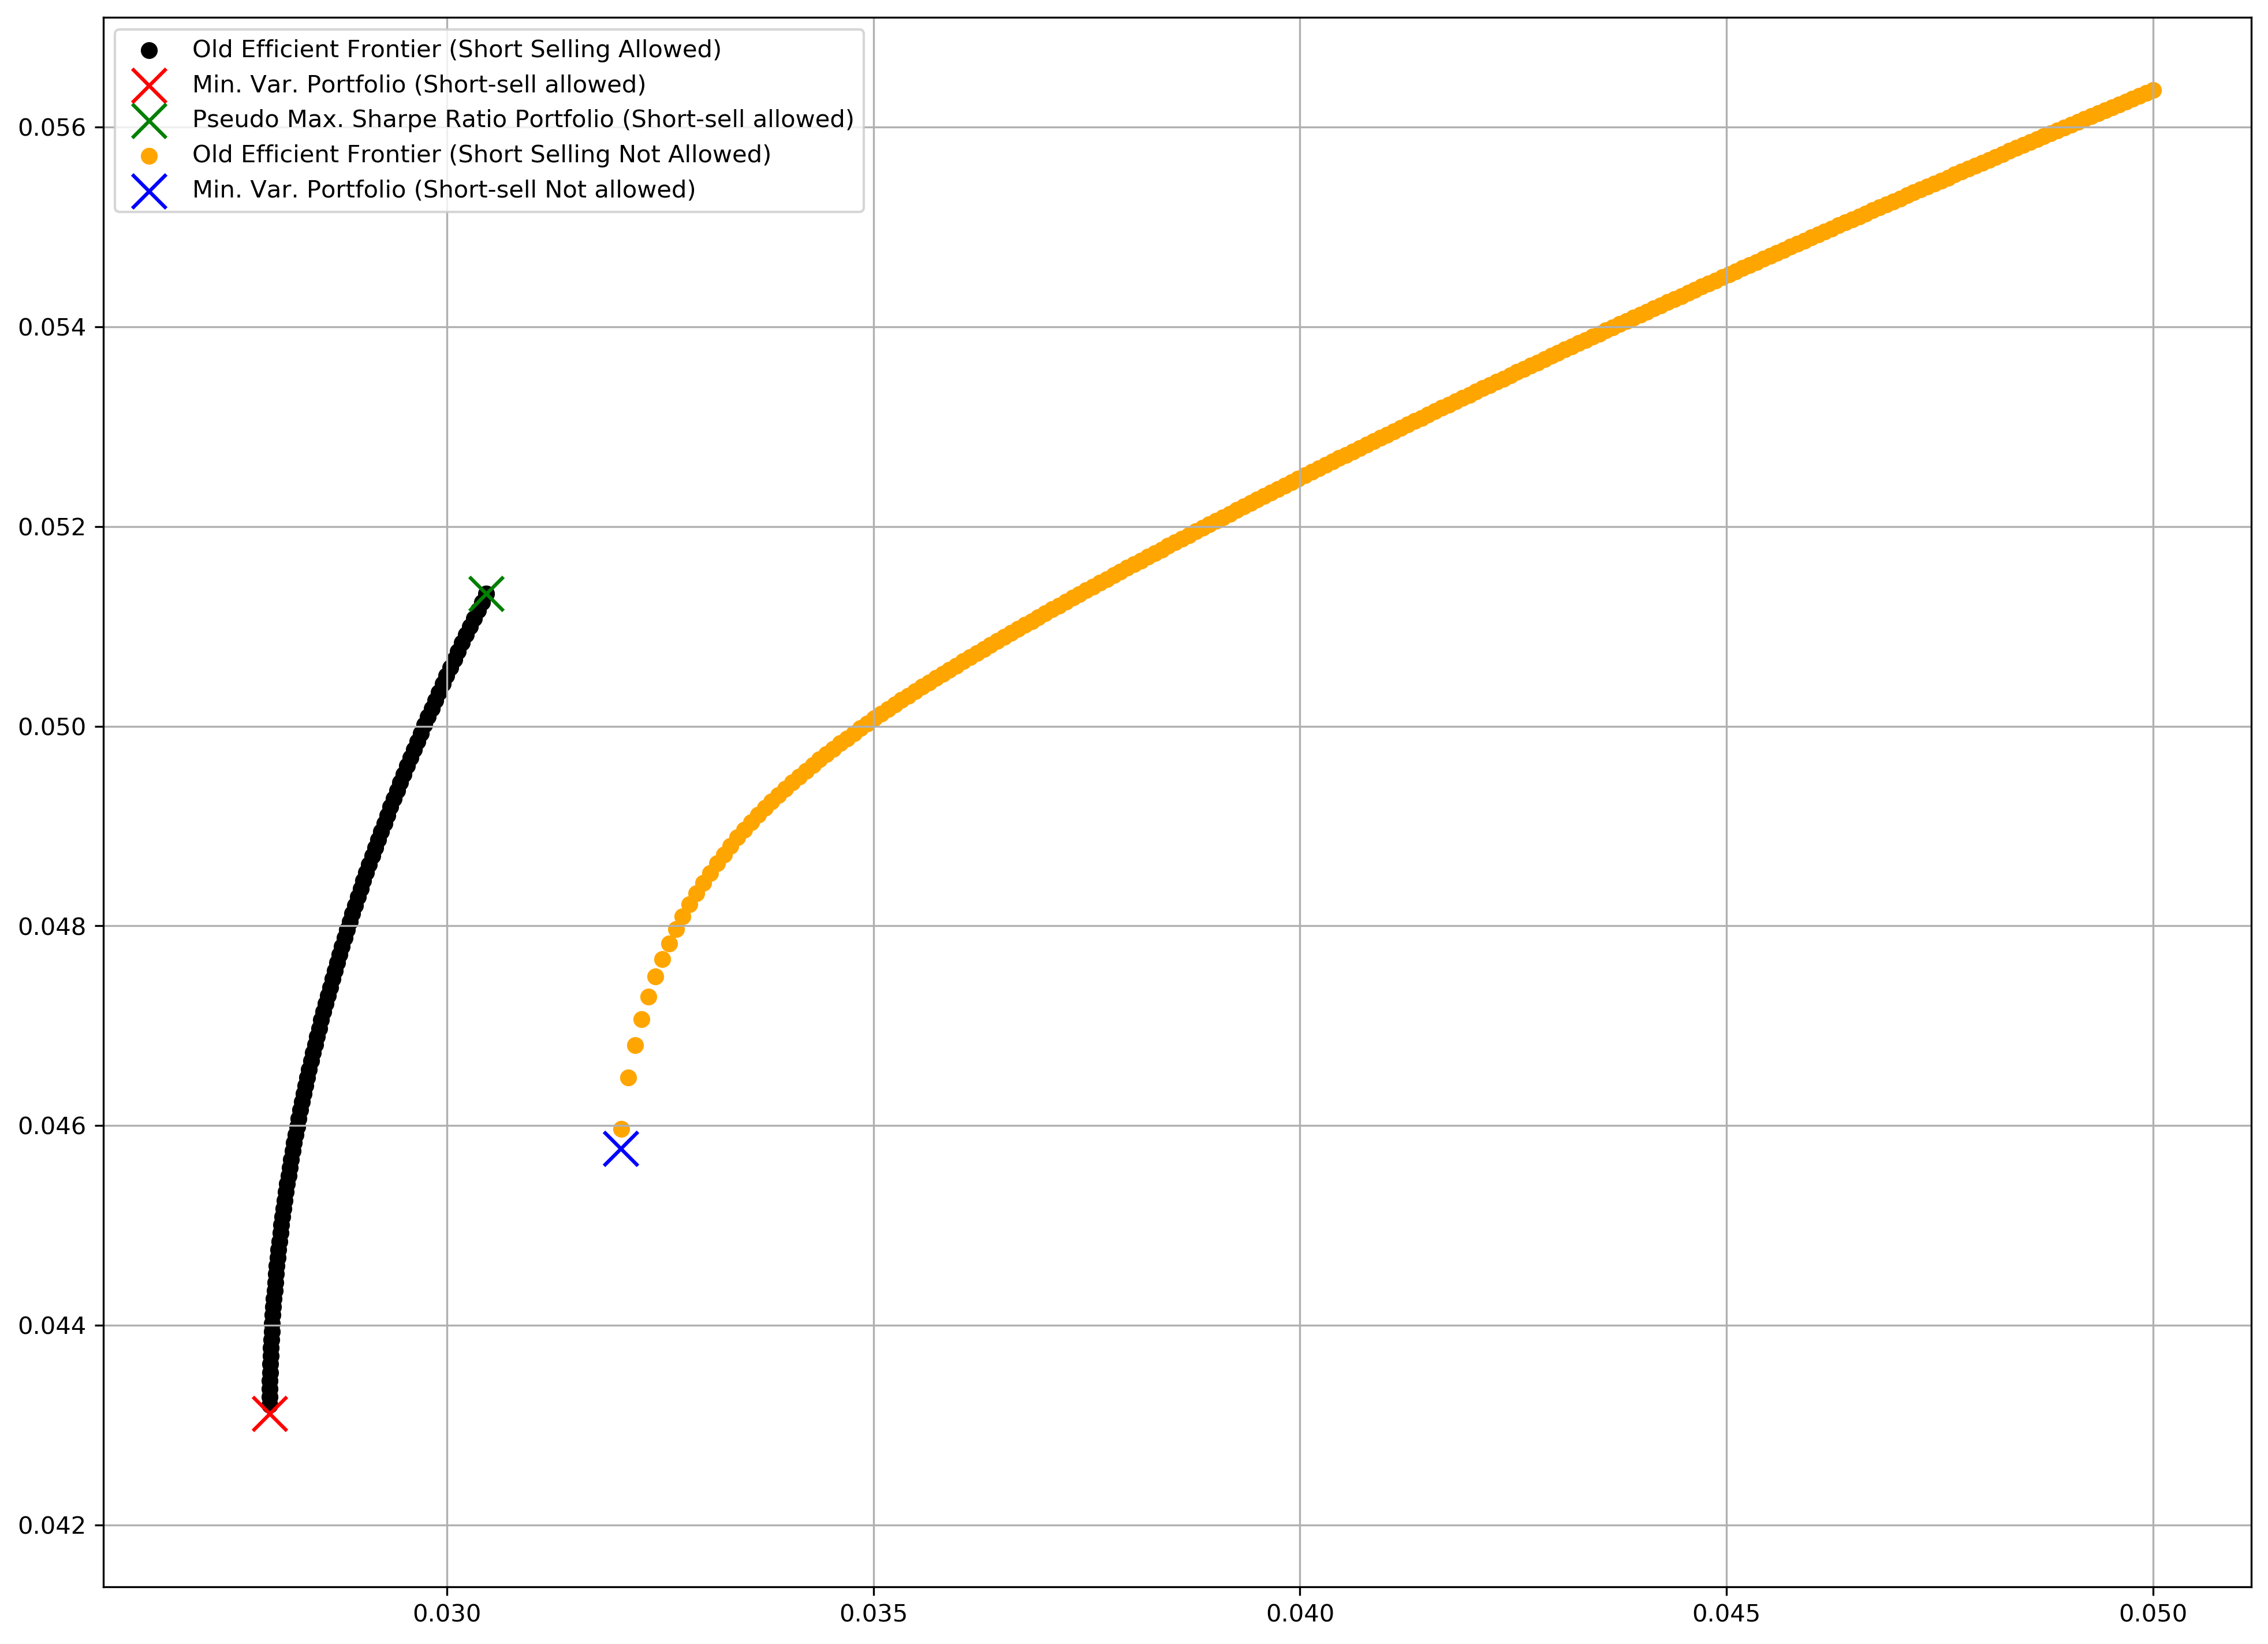

<IPython.core.display.Javascript object>

In [28]:
plt.scatter(
    *list(zip(*old_efficient_frontier)),
    c="black",
    label="Old Efficient Frontier (Short Selling Allowed)"
)
plt.scatter(
    (w_minvar_shortsell_allowed @ Σ @ w_minvar_shortsell_allowed) ** 0.5,
    w_minvar_shortsell_allowed.T @ μ,
    c="red",
    marker="x",
    s=200,
    label="Min. Var. Portfolio (Short-sell allowed)",
)
plt.scatter(
    (w_msr_shortsell_allowed @ Σ @ w_msr_shortsell_allowed) ** 0.5,
    w_msr_shortsell_allowed.T @ μ,
    c="green",
    marker="x",
    s=200,
    label="Pseudo Max. Sharpe Ratio Portfolio (Short-sell allowed)",
)

plt.scatter(
    *list(zip(*new_efficient_frontier)),
    c="orange",
    label="Old Efficient Frontier (Short Selling Not Allowed)"
)
plt.scatter(
    (w_minvar.value.T @ Σ @ w_minvar.value) ** 0.5,
    w_minvar.value.T @ μ,
    c="blue",
    marker="x",
    s=200,
    label="Min. Var. Portfolio (Short-sell Not allowed)",
)
# plt.scatter(
#     (w_msr_shortsell_allowed @ Σ @ w_msr_shortsell_allowed) ** 0.5,
#     w_msr_shortsell_allowed.T @ μ,
#     c="green",
#     marker="x",
#     s=200,
#     label="Pseudo Max. Sharpe Ratio Portfolio (Short-sell allowed)",
# )

plt.grid(True)
plt.legend()
plt.show()